In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset_all_2.csv')

df_up = df[(df.Tipo == "Upload") & (df.Anno == 2021)]
df_down = df[(df.Tipo == "Download") & (df.Anno == 2021)]
df_up


,Unnamed: 0,Operatore,Profilo,Velocità (down/up),Territorio,Periodo,Tipo,Media,Dev. Std.,Min,Max,TP%,Misure,Anno
551,551,Fastweb,"Superjet,Joy,Jet","\r\n12,0Mbps1,0Mbps\r\n",Piemonte,\r\nGen2021Giu2021\r\n,Upload,898.3kbps,"11,6",898.3kbps,NaN,NaN,8137,2021
554,554,Fastweb,"Superjet,Joy,Jet","\r\n20,0Mbps1,0Mbps\r\n",Piemonte,\r\nGen2021Giu2021\r\n,Upload,899.6kbps,"0,5",898.4kbps,NaN,NaN,8407,2021
557,557,Optima,VitaMiaConsumerFIBRA+FlatvsFissi,"\r\n100,0Mbps20,0Mbps\r\n",Piemonte,\r\nGen2021Giu2021\r\n,Upload,"19,5Mbps","991,3","17,5Mbps",NaN,NaN,8053,2021
560,560,TIM,TIMSuperADSL,"\r\n10,0Mbps1,0Mbps\r\n",Piemonte,\r\nGen2021Giu2021\r\n,Upload,"1,0Mbps","24,5","1,0Mbps",NaN,NaN,8133,2021
563,563,TIM,TIMSuperMega,"\r\n30,0Mbps3,0Mbps\r\n",Piemonte,\r\nGen2021Giu2021\r\n,Upload,"3,0Mbps","49,8","3,0Mbps",NaN,NaN,8401,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11591,11591,BritishTelecom,"VipClub7Mega,VipSmart7Mega,VipDuet,VipAssolo","\r\n7,0Mbps1,0Mbps\r\n",Sardegna,\r\nLug2021Dic2021\r\n,Upload,255.8kbps,"1,8",255.8kbps,NaN,NaN,8336,2021
11594,11594,Eolo,Formula,"\r\n20,0Mbps1,0Mbps\r\n",Sardegna,\r\nLug2021Dic2021\r\n,Upload,328.5kbps,"34,7",310.5kbps,NaN,NaN,7667,2021
11597,11597,Fastweb,"Superjet,Joy,Jet","\r\n12,0Mbps1,0Mbps\r\n",Sardegna,\r\nLug2021Dic2021\r\n,Upload,413.0kbps,"17,7",413.7kbps,NaN,NaN,16957,2021
11600,11600,Tiscali,TuttoIncluso,"\r\n8,0Mbps1,0Mbps\r\n",Sardegna,\r\nLug2021Dic2021\r\n,Upload,882.1kbps,"52,5",878.7kbps,NaN,NaN,5544,2021


In [34]:
import re
m = []
for i in range(0, len(df_up)):
    
    if df_up.iloc[i].Media.find("kbps") != -1:
        m.append(float(re.findall("[-+]?(?:\d*\,*\d+)", df_up.iloc[i].Media)[0].replace(',','.')) / 1000)
        print(df_up.iloc[i].Media)
    else:
        m.append(float(re.findall("[-+]?(?:\d*\,*\d+)", df_up.iloc[i].Media)[0].replace(',','.')))
df_up["up_f"] = m
m = []

for i in range(0, len(df_down)):
    m.append(float(re.findall("[-+]?(?:\d*\,*\d+)", df_down.iloc[i].Media)[0].replace(',','.')))
df_up["down_f"] = m
df_up
df_up_down_media = df_up.drop(["Unnamed: 0","Profilo","Velocità (down/up)","Operatore","Periodo","Tipo","Media","Dev. Std.","Min","Max","TP%","Misure"],axis = 1)
df_up_down_media
df_up_down_media = df_up_down_media.groupby(["Territorio","Anno"]).mean().reset_index()
df_up_down_media = df_up_down_media.sort_values(by = ['down_f'])
df_up_down_media

898.3kbps
899.6kbps
984.9kbps
441.1kbps
871.9kbps
899.2kbps
898.3kbps
989.3kbps
441.1kbps
869.1kbps
259.1kbps
893.3kbps
968.2kbps
873.4kbps
259.1kbps
880.7kbps
936.6kbps
966.2kbps
873.4kbps
902.1kbps
818.6kbps
539.3kbps
993.7kbps
905.2kbps
816.4kbps
539.9kbps
993.6kbps
381.4kbps
398.0kbps
893.9kbps
903.3kbps
960.2kbps
869.9kbps
991.2kbps
872.3kbps
379.6kbps
405.3kbps
220.4kbps
865.4kbps
824.8kbps
960.5kbps
903.3kbps
924.8kbps
989.3kbps
775.8kbps
865.4kbps
603.3kbps
954.9kbps
952.4kbps
848.6kbps
222.4kbps
930.2kbps
738.0kbps
610.3kbps
899.4kbps
927.4kbps
941.2kbps
966.6kbps
870.2kbps
222.1kbps
931.7kbps
723.9kbps
487.9kbps
866.5kbps
945.5kbps
978.3kbps
870.2kbps
80.9kbps
907.3kbps
846.3kbps
866.4kbps
976.1kbps
979.7kbps
79.7kbps
907.2kbps
848.9kbps
915.1kbps
978.7kbps
557.0kbps
521.8kbps
809.7kbps
466.4kbps
903.4kbps
958.1kbps
909.8kbps
849.8kbps
925.9kbps
556.0kbps
522.0kbps
789.0kbps
443.2kbps
658.9kbps
902.9kbps
957.4kbps
910.0kbps
850.3kbps
114.1kbps
926.0kbps
421.3kbps
421.1kbps
67

C:\Users\alex\AppData\Local\Temp\ipykernel_26432\1454997189.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up["up_f"] = m
C:\Users\alex\AppData\Local\Temp\ipykernel_26432\1454997189.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up["down_f"] = m


,Territorio,Anno,up_f,down_f
12,Sardegna,2021,0.624538,8.846154
0,Abruzzo,2021,0.646625,10.687500
9,Molise,2021,1.323000,16.056250
4,Friuli-VeneziaGiulia,2021,1.467857,16.185714
3,Emilia-Romagna,2021,2.842207,18.896552
13,Sicilia,2021,3.272423,19.461538
18,Veneto,2021,2.935778,21.433333
15,Trentino-AltoAdige,2021,5.056440,36.108000
10,Piemonte,2021,6.819450,37.620000
6,Liguria,2021,8.310407,39.425926


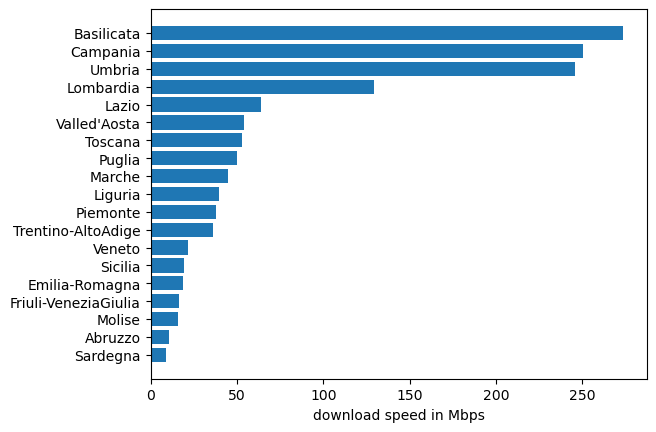

In [35]:
import matplotlib.pyplot as plt


plt.barh(df_up_down_media['Territorio'], df_up_down_media['down_f'])
plt.xlabel('download speed in Mbps')
plt.show()

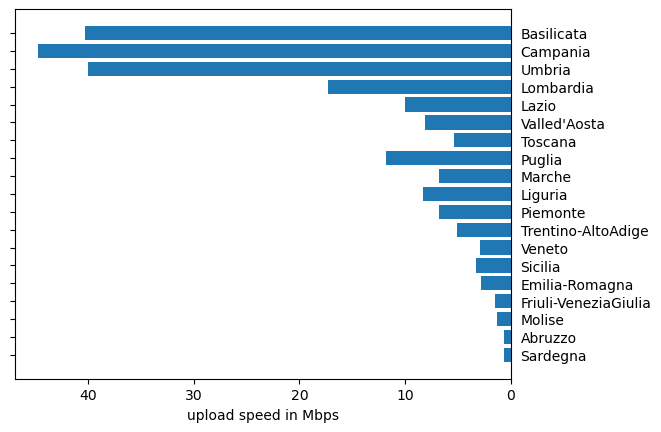

In [43]:
plt.barh(df_up_down_media['Territorio'], df_up_down_media['up_f'])
plt.xlabel('upload speed in Mbps')
plt.gca().invert_xaxis()
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.show()